# T-test comparing EV adoption rate for high and low air quality counties

## Imports and data reading

In [20]:
from scipy import stats
from scipy.stats import zscore, shapiro, spearmanr, pearsonr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#Read in the main df and group it by county taking the median of all columns in order to have an average for 
#PM2.5 over all years that is not impacted by extreme values
df = pd.read_csv('main_df.csv')
dfg = df.groupby('County').median()

## T-test

In [6]:
#Take the top 25% and bottom 25% counties in terms of PM2.5 levels  
q75 = dfg.loc[:, 'Average PM 2.5/County'].quantile(.75)
q25 = dfg.loc[:, 'Average PM 2.5/County'].quantile(.25)

dfLn = list(dfg[dfg['Average PM 2.5/County'] <= q25].index)
dfHn = list(dfg[dfg['Average PM 2.5/County'] >= q75].index)

dfL = df[df['County'].isin(dfLn)]
dfH = df[df['County'].isin(dfHn)]

dfL = dfL[dfL['Data Year'] == 2022]
dfH = dfH[dfH['Data Year'] == 2022]

In [11]:
#Find the EV adoption rate of the counties chosen above
EVL = dfL.loc[:, 'Number of EV']/(dfL.loc[:, 'Number of EV']+dfL.loc[:, 'Number of Gas Cars'])
EVH = dfH.loc[:, 'Number of EV']/(dfH.loc[:, 'Number of EV']+dfH.loc[:, 'Number of Gas Cars'])

#Conduct a Welch's t-test for independence since the variance between counties is not identical
pvalue = stats.ttest_ind(EVL, EVH, equal_var = False)[1]
print('The p-value is: ', pvalue)

The p-value is:  0.0037663110741704424


499    0.029025
502    0.019503
507    0.009357
510    0.074546
515    0.019599
516    0.022441
522    0.026859
527    0.030146
529    0.026873
531    0.036559
532    0.011311
535    0.036502
538    0.005027
dtype: float64

# Violin Plot

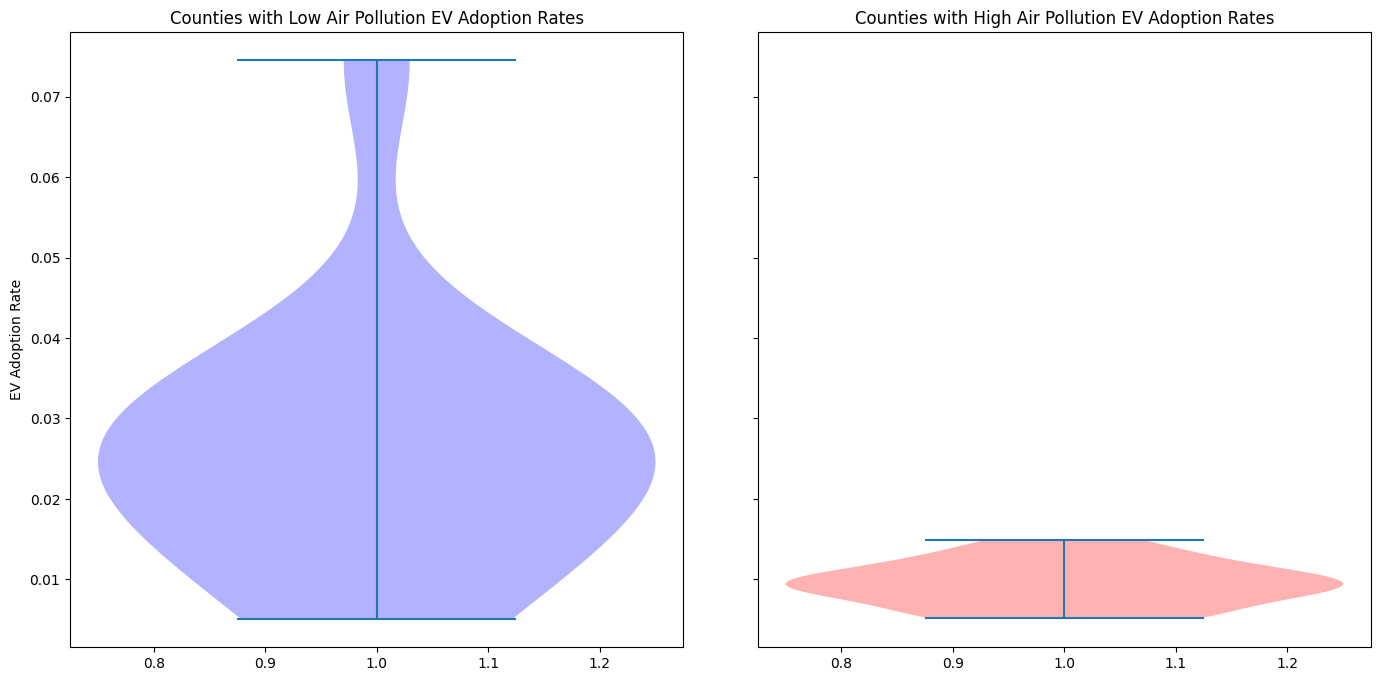

In [8]:
#Create matplot figure and two subplot axes that share y
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8), sharey=True)

#Create first violinplot of low air pollutin counties EV adoption rate
parts1 = ax1.violinplot(EVL)
ax1.set_title('Counties with Low Air Pollution EV Adoption Rates')
ax1.set_ylabel('EV Adoption Rate')

#Loop through all facecolors and set them equal to blue
for pc in parts1['bodies']:
    pc.set_facecolor('blue')

#Create second violinplot of high air pollutin counties EV adoption rate
parts2 = ax2.violinplot(EVH)
ax2.set_title('Counties with High Air Pollution EV Adoption Rates')

#Loop through all facecolors and set them equal to red
for pc in parts2['bodies']:
    pc.set_facecolor('red')

#Clean up figure and save
plt.tight_layout(pad=5)
plt.savefig('Violin.png')

# Correlation Check
We'll check to see if there is any correlation using the spearman R method. 

In [26]:
stat, p = spearmanr(dfL['Average PM 2.5/County'], EVL)

print(round(stat,3),round(p,4))

0.203 0.5053


In [27]:
stat, p = spearmanr(dfH['Average PM 2.5/County'], EVH)

print(round(stat,3),round(p,4))

0.192 0.5291
